# DBSCAN 모듈화

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.cluster import *

### [2] 데이터 가져오기 + 스케일링

In [2]:
origin: DataFrame = my_read_excel(path="https://data.hossam.kr/mldata/iris.xlsx", categories=['Species'], info=False)

df = origin.drop(labels='Species', axis=1)
df = my_standard_scaler(data=df)
df


상위 5개 행
+----+----------------+---------------+----------------+---------------+-----------+
|    |   Sepal.Length |   Sepal.Width |   Petal.Length |   Petal.Width | Species   |
|----+----------------+---------------+----------------+---------------+-----------|
|  0 |            5.1 |           3.5 |            1.4 |           0.2 | setosa    |
|  1 |            4.9 |             3 |            1.4 |           0.2 | setosa    |
|  2 |            4.7 |           3.2 |            1.3 |           0.2 | setosa    |
|  3 |            4.6 |           3.1 |            1.5 |           0.2 | setosa    |
|  4 |              5 |           3.6 |            1.4 |           0.2 | setosa    |
+----+----------------+---------------+----------------+---------------+-----------+


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


## #02. 모듈화 기능 확인 - 단일 군집

### [1] 단순 군집화

In [3]:
dbscan = my_single_dbscan(df)
dbscan

DBSCAN(n_jobs=-1)

### [2] 군집 결과 시각화

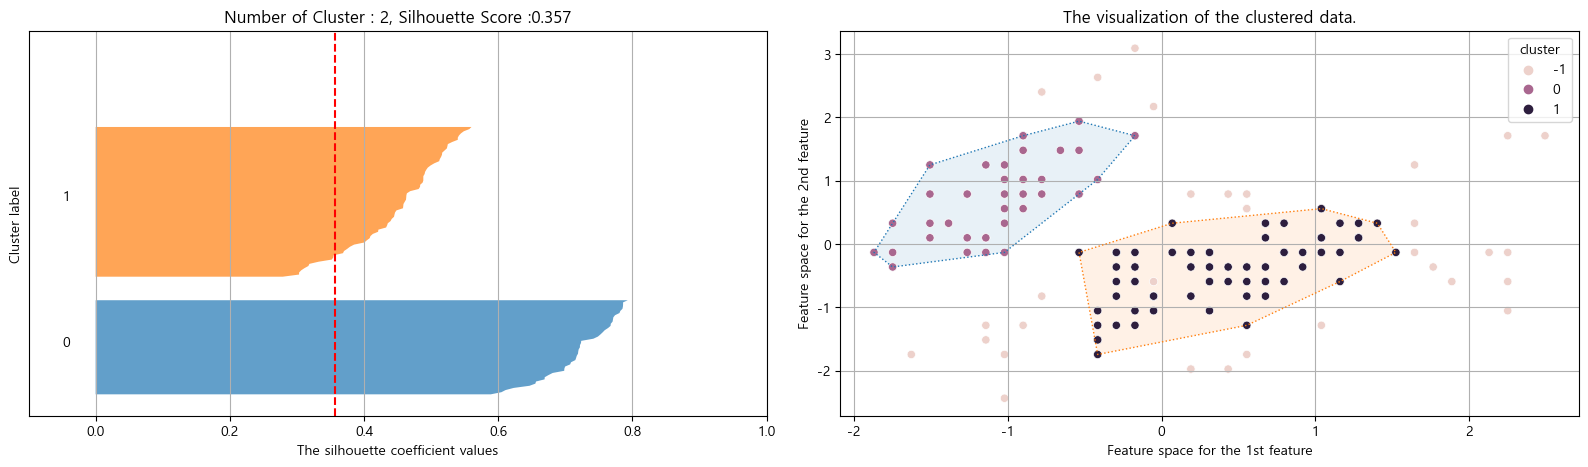

In [4]:
my_cluster_plot(dbscan, df)

### [3] k근접이웃 활용 ems값 찾기

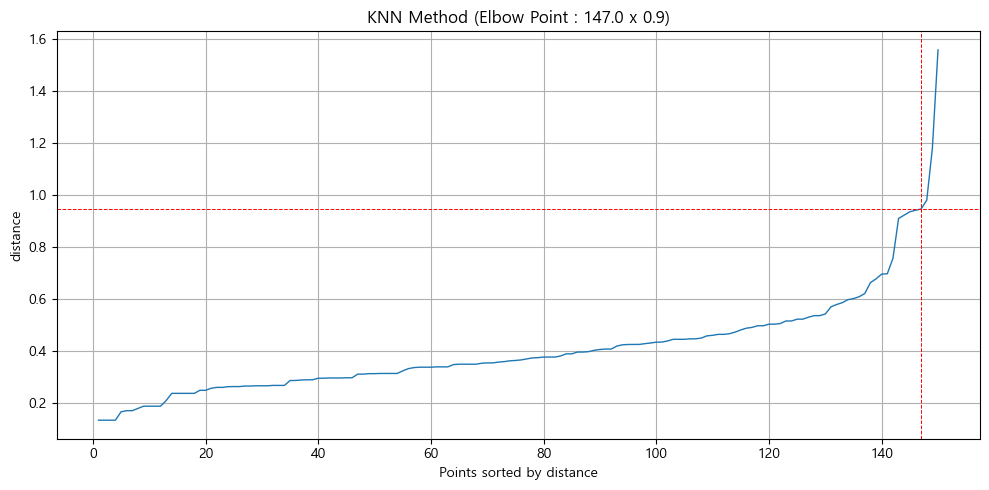

0.9463847901515665

In [5]:
eps = my_n_neighbors(df, 3)
eps

### [4] 도출된 결과에 따른 DBSCAN

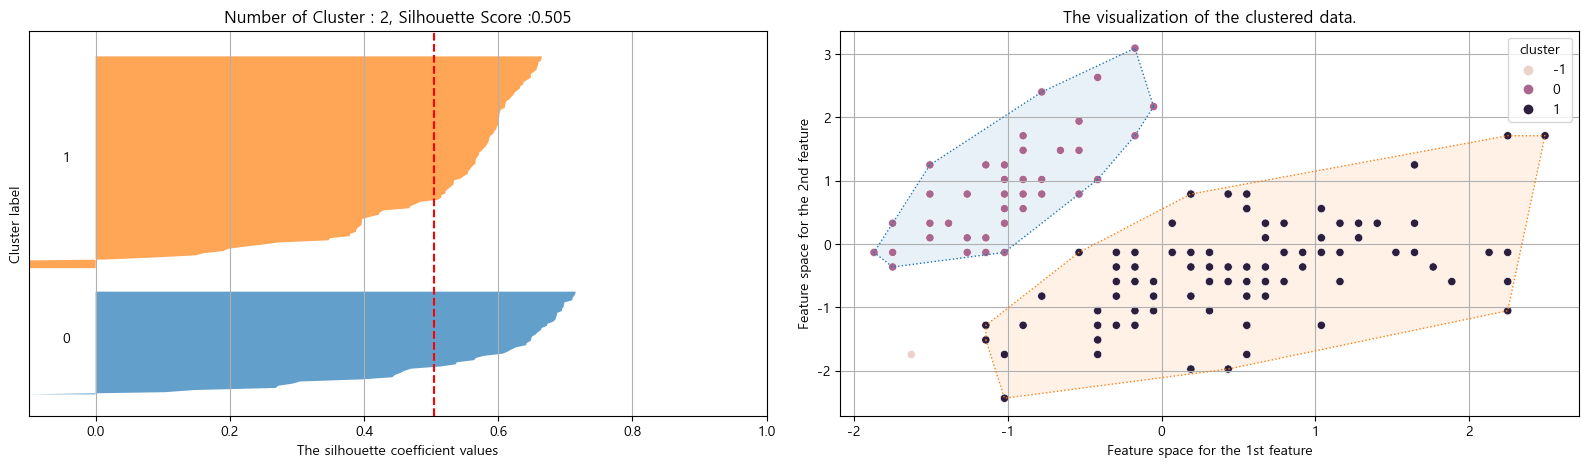

In [6]:
dbscan = my_single_dbscan(df, eps=eps, min_samples=3)
my_cluster_plot(dbscan, df)

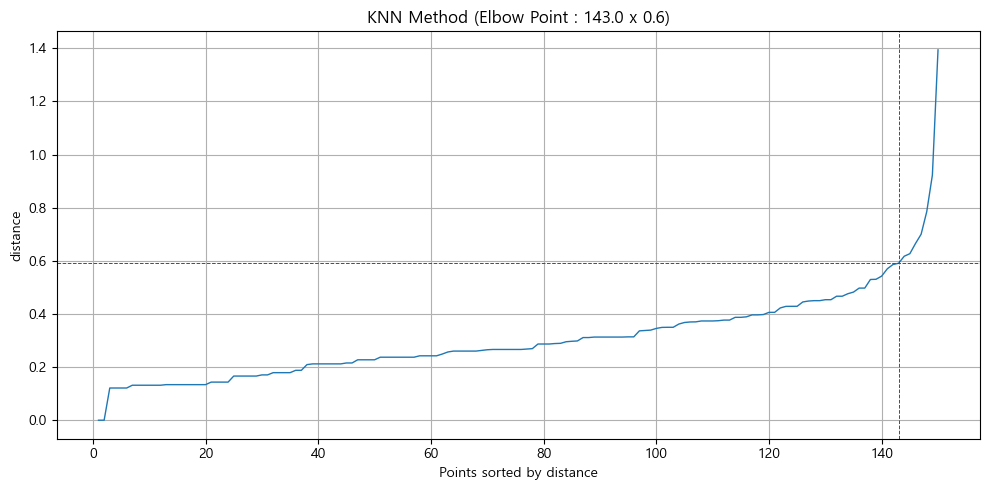

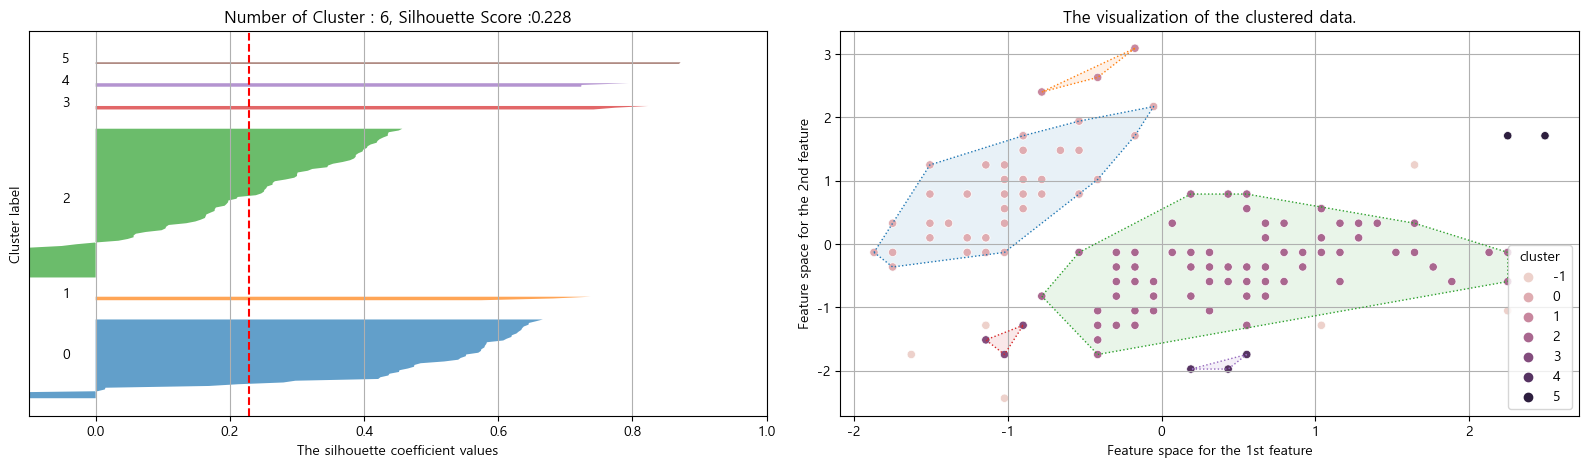

DBSCAN(eps=0.5906615737972177, min_samples=2, n_jobs=-1)

In [7]:
my_knn_dbscan(df, k=2)

### [5] 2부터 k값까지 반복 수행

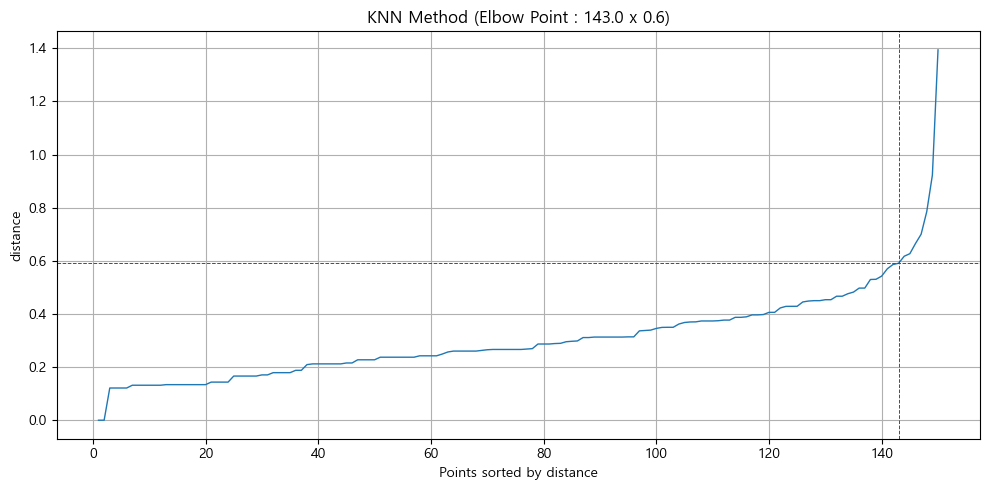

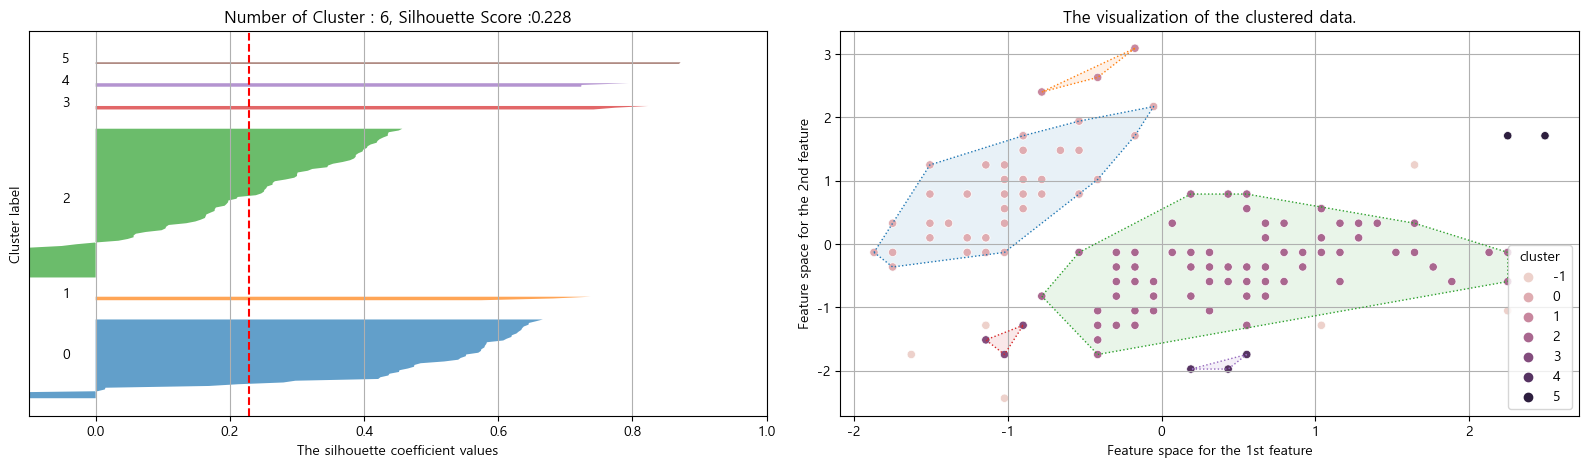

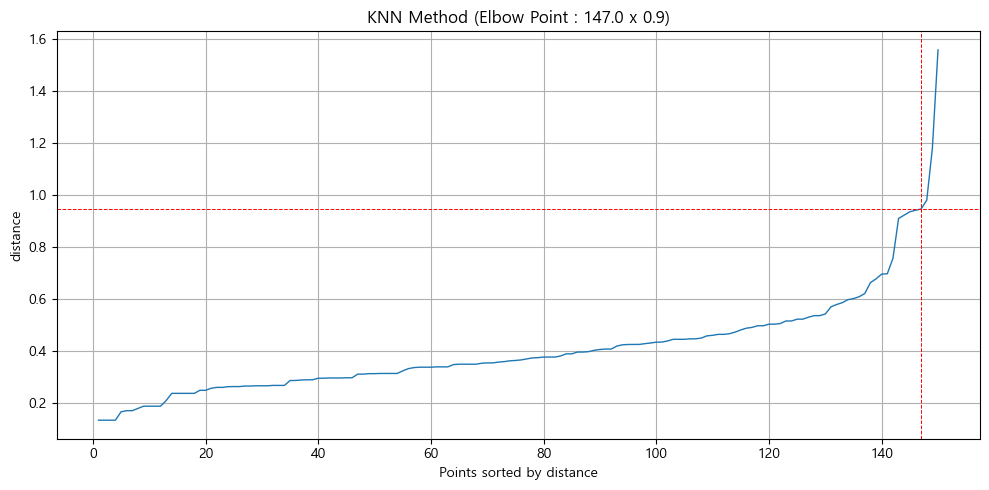

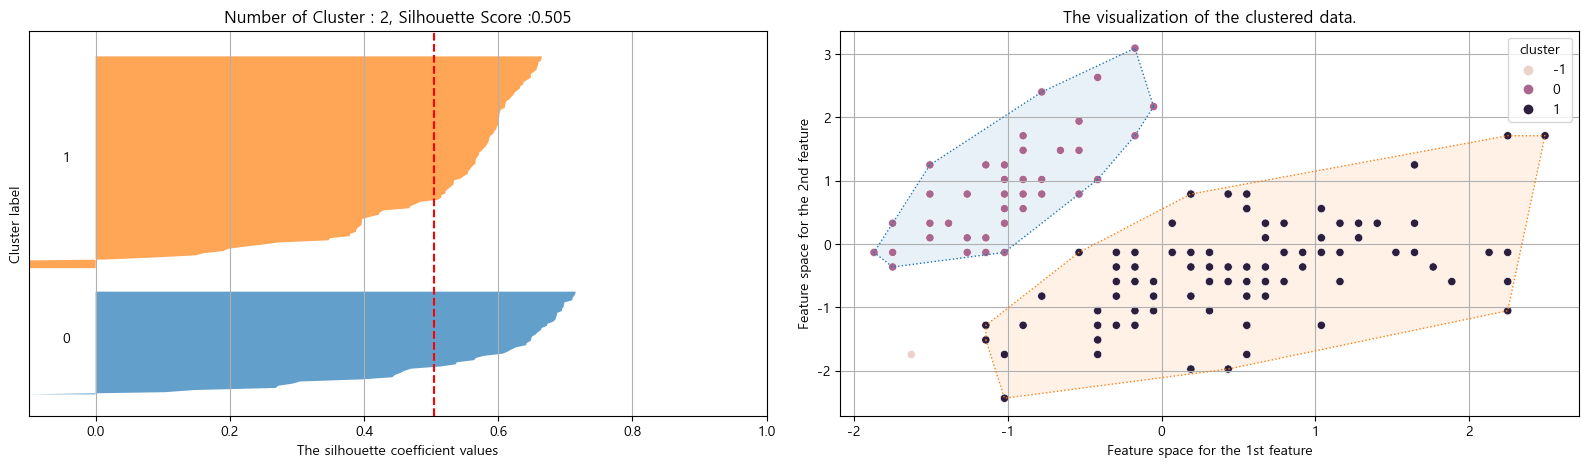

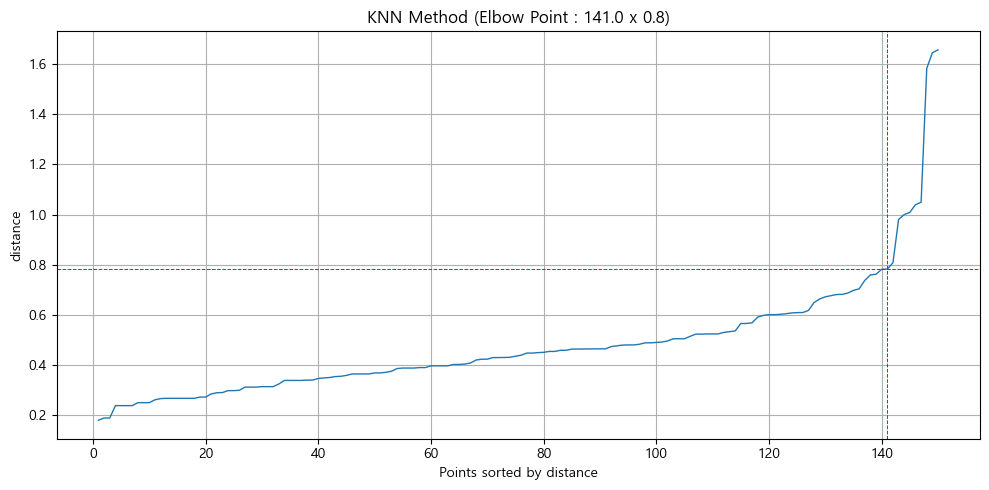

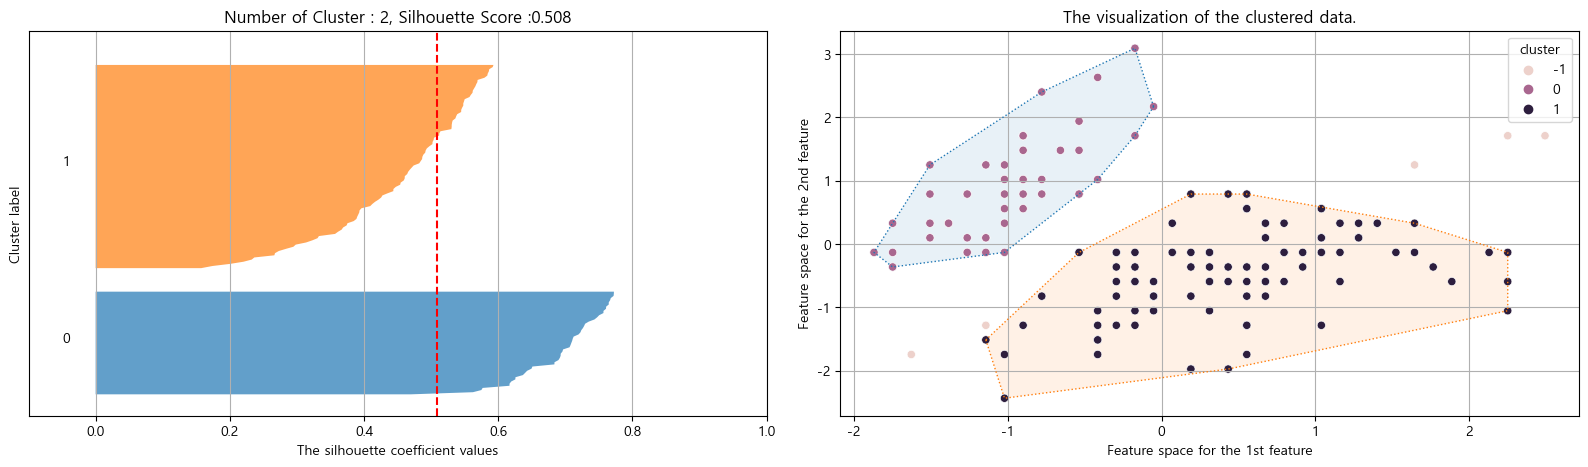

[DBSCAN(eps=0.5906615737972177, min_samples=2, n_jobs=-1),
 DBSCAN(eps=0.9463847901515665, min_samples=3, n_jobs=-1),
 DBSCAN(eps=0.7824834370849291, min_samples=4, n_jobs=-1)]

In [8]:
k = 4

my_dbscan(df, k=k)